In [12]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    ! pip install -r /content/drive/MyDrive/Tübingen/Sem1/DLit/Project/requirements.txt


In [9]:
import os, re, json, requests
import PyPDF2
import urllib.request
from bs4 import BeautifulSoup
from scipy import stats


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if IN_COLAB:
    os.chdir('/content/drive/MyDrive/Tübingen/Sem1/DLit/Project')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tübingen/Sem1/DLit/Project'

In [4]:
import maps

In [5]:
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

In [6]:
DATA_DIR = 'data/'
!ls $DATA_DIR; tree $DATA_DIR/

2019  2021
/bin/bash: line 1: tree: command not found


In [7]:
# the following pages in the pdfs contain the variable names, size and their location
page_limits = {
    '2007': [21, 141],
    '2009': [21, 138],
    '2010': [21, 143],
    '2011': [21, 163],
    '2013': [21, 147],
    '2015': [21, 150],
    '2017': [21, 145]
    # we already have pdfs for 2019 and 2021
}



# link to html pages with all variables for internet supplement
# primary link: https://api.census.gov/data.html ---> go to this and click on variables tab
html_file_urls = {
    '2007': 'https://api.census.gov/data/2007/cps/internet/oct/variables.html',
    '2009': 'https://api.census.gov/data/2009/cps/internet/oct/variables.html',
    '2010': 'https://api.census.gov/data/2010/cps/internet/oct/variables.html',
    '2011': 'https://api.census.gov/data/2011/cps/internet/jul/variables.html',
    '2013': 'https://api.census.gov/data/2013/cps/internet/jul/variables.html',
    '2015': 'https://api.census.gov/data/2015/cps/internet/jul/variables.html',
    '2017': 'https://api.census.gov/data/2017/cps/internet/nov/variables.html',
    '2019': 'https://api.census.gov/data/2019/cps/internet/nov/variables.html',
    '2021': 'https://api.census.gov/data/2021/cps/internet/nov/variables.html'
}

# variables = {

# }

In [8]:
def find_variables_list(url):
    listing = url
    content = requests.get(listing)
    soup = BeautifulSoup(content.text)

    tbody = soup.find_all("tbody".split())[0]
    anchortags = tbody.find_all('a', href=True)[::2]
    variables = list([anchortag['name'] for anchortag in anchortags
                     if anchortag['name'] not in ["for", "in", "ucgid"]
                     ])
    return variables


def find_variables_list_all(urls):

    variables = {}

    for year, url in urls.items():
        variables[year] = find_variables_list(url)
        print(f"year {year}: found #{len(variables[year])} variables")

    return variables

variables_all = find_variables_list_all(html_file_urls)

KeyboardInterrupt: ignored

In [37]:
PERSONTYPE = 'PRPERTYP'
SEX = 'PESEX'
AGE = 'PRTAGE'
STATECODE = 'GESTFIPS'
SOCIALMEDIA = 'PESOCIAL'
TEXTING = 'PETEXTIM'
EMAIL = 'PEEMAIL'

# During the past year, (have you/has any member of your household) been affected by an
# online security breach, identity theft, or a similar crime?
CYBERCRIME='HEPSCYBA'


#what concerns (you/members of this household) the most when it comes to online privacy and security risks?
CONCERNS_MAP = {
    'HEPSCON1': 'Identity theft',
    'HEPSCON2': 'Credit card or banking fraud',
    'HEPSCON3': 'Data collection or tracking by online services',
    'HEPSCON4': 'Data collection or tracking by government',
    'HEPSCON5': 'Loss of control over personal data such as email or social network profiles',
    'HEPSCON6': 'Threats to personal safety, such as online harassment, stalking, or cyberbullying',
    'HEPSCON8': 'Other concerns'
}

# During the past year, have concerns about privacy or security STOPPED (you/anyone in this household)
# from doing any of these activities online
ACTIVITIES_MAP = {
    'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
    'HEPSPRE2': 'Buying goods or services online?',
    'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
    'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
    'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'
}



In [10]:
year = '2021'
# variables = variables_all[year]
CSV_FILE_PATH = os.path.join(DATA_DIR, f"{year}/nov{year[2:]}pub.csv")

In [11]:
# year1 = '2019'
# variables1 = variables_all[year1]
# CSV_FILE_PATH1 = os.path.join(DATA_DIR, f"{year1}/nov{year1[2:]}pub.csv")

In [12]:
# CSV_FILE_PATH, CSV_FILE_PATH1

In [13]:
# df19 = pd.read_csv(CSV_FILE_PATH1)
# filter out only adults and (male/female) population
# df19 = df19[(df19[PERSONTYPE] == 2) * (df19[SEX] != -1)]

In [14]:
# df19

In [15]:
df21 = pd.read_csv(CSV_FILE_PATH)
# df21 = df21[(df21[PERSONTYPE] == 2) * (df21[SEX] != -1)]
df21 = df21[(df21[AGE] >= 10) * (df21[SEX] != -1)]
columns = df21.columns.to_list()
df21

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNPER,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PX

In [16]:
df21[AGE].unique()

array([24, 28, 45, 30, 22, 42, 70, 62, 54, 39, 19, 33, 14, 73, 76, 61, 67,
       65, 59, 56, 58, 36, 40, 71, 68, 21, 72, 60, 51, 52, 48, 75, 74, 16,
       32, 29, 35, 53, 38, 43, 78, 20, 23, 26, 41, 27, 57, 85, 15, 31, 10,
       55, 46, 47, 49, 34, 66, 25, 17, 12, 79, 80, 13, 63, 77, 69, 44, 50,
       64, 11, 18, 37])

In [17]:
'PERIDNUM' in sorted([item for item in df21.columns.to_list() if item.startswith("P")])

False

In [18]:
# intersection = list(set(columns).intersection(set(variables)))
# len(intersection)

In [19]:
# difference = list(set(columns).difference(set(variables)))
# len(difference)

In [20]:
# df = df21[(df21[PERSONTYPE] == 2) * (df21[SEX] != -1)]

In [21]:
query_string1 = ' or '.join([f'{item} == 1' for item in [f'HEPSCON{i}' for i in [1,2,3,4,5,6,8]]])
query_string2 = ' or '.join([f'{item} == 1' for item in [f'HEPSPRE{i}' for i in [1,2,3,4,5]]])

In [22]:
df21.query(query_string2)[ACTIVITIES_MAP.keys()]

,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5
6,1,1,2,2,2
7,1,1,2,2,2
8,1,1,2,2,2
9,1,1,2,2,2
18,1,2,2,2,2
...,...,...,...,...,...
127279,1,1,1,2,1
127280,1,1,1,2,1
127328,1,1,2,2,1
127369,1,2,2,2,2


In [23]:
df21.query(query_string2)

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNPER,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PX

In [24]:
df21.query(query_string1)

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNPER,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PX

In [25]:
df21.query('not '+ '('+query_string1+')')[CONCERNS_MAP.keys()]

,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8
0,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2
19,2,2,2,2,2,2,2
20,2,2,2,2,2,2,2
49,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
127268,2,2,2,2,2,2,2
127362,-1,-1,-1,-1,-1,-1,-1
127372,-1,-1,-1,-1,-1,-1,-1
127373,-1,-1,-1,-1,-1,-1,-1


## Inspect each useful column

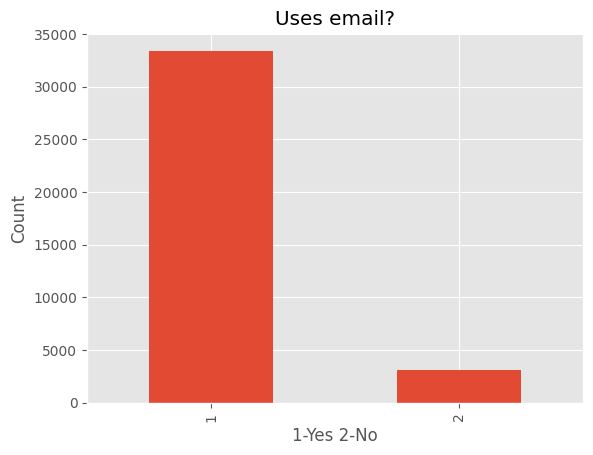

In [26]:
ax = df21.query('PEEMAIL != -1')[EMAIL].value_counts().plot(kind='bar', title='Uses email?')
ax.set_xlabel("1-Yes 2-No")
ax.set_ylabel("Count")
# 1-yes
# 2-no
# -1 -did not respond
plt.show()

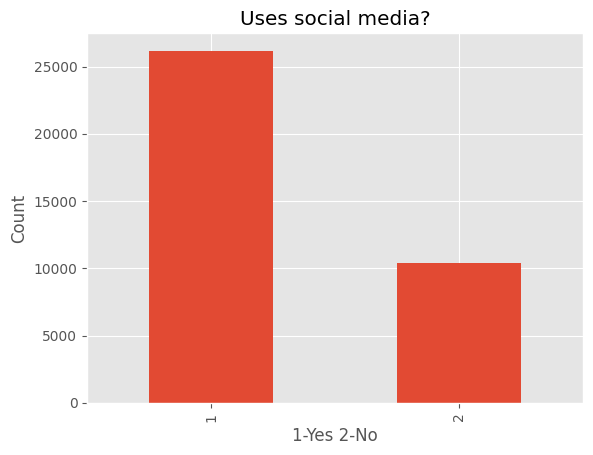

In [27]:
ax = df21.query('PESOCIAL != -1')[SOCIALMEDIA].value_counts().plot(kind='bar', title='Uses social media?')
ax.set_xlabel("1-Yes 2-No")
ax.set_ylabel("Count")
plt.show()

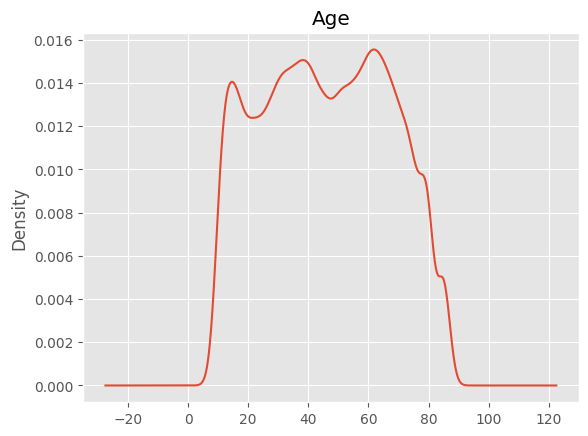

In [28]:
ax = df21[AGE].plot(kind='kde', title='Age')

Text(0.5, 0, '2-Female, 1-Male')

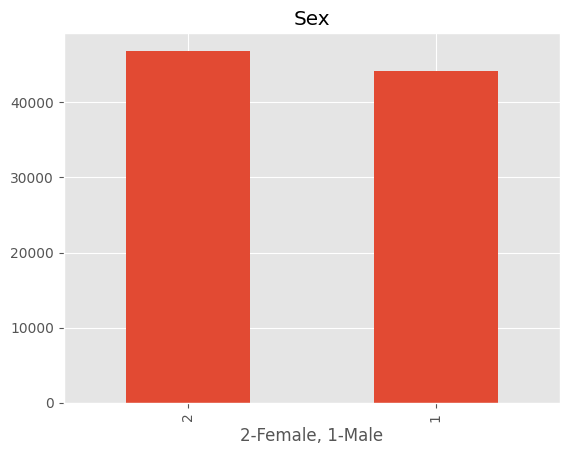

In [29]:
ax = df21[SEX].value_counts().plot(kind='bar', title='Sex')
ax.set_xlabel("2-Female, 1-Male")

In [30]:
df21['state'] = df21.apply(lambda row: maps.StatesMap[row[STATECODE]], axis=1)

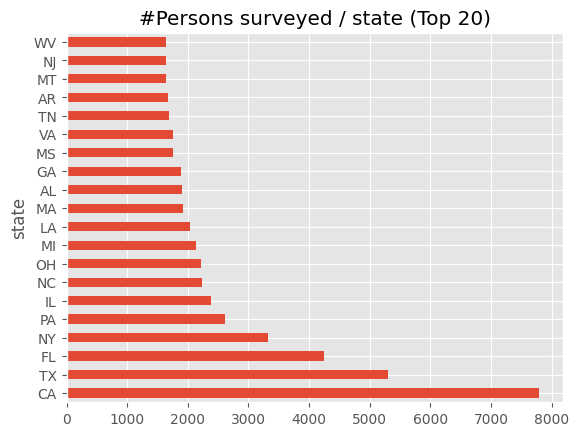

In [31]:
df21['state'].value_counts().head(20).plot(kind='barh', title='#Persons surveyed / state (Top 20)')
plt.show()

<Axes: xlabel='HEPSCYBA'>

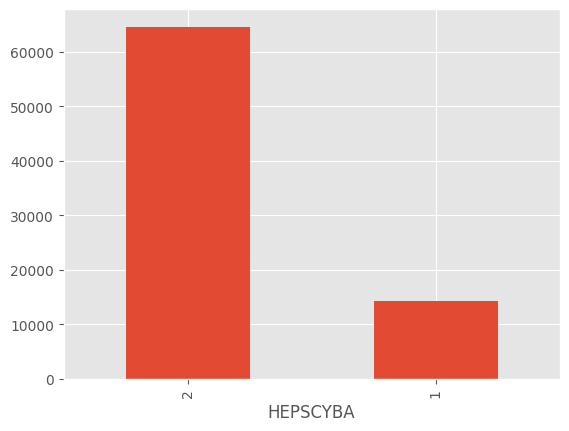

In [32]:
df21.query('HEPSCYBA != -1')[CYBERCRIME].value_counts().plot(kind='bar')

## Inspecting pairs of columns together
- male/female email/social media usage
- state wise email/social media usage (fractional because different states have different people)
note that we need to normalize by #total people in that state!!

In [33]:
concerns = [f'HEPSCON{i}' for i in range(1, 9) if i!=7]
activities = list(ACTIVITIES_MAP.keys())
activities

['HEPSPRE1', 'HEPSPRE2', 'HEPSPRE3', 'HEPSPRE4', 'HEPSPRE5']

# Q: In a given state, what is the concern that most people have?

In [34]:
state_population = df21['state'].value_counts().to_dict()
state_population['AL']

1905

In [35]:
state_concern_map = {}
for statecode, statename in maps.StatesMap.items():
    print(statename)

    _df = df21.query('state == @statename')[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    state_concern_map[statename] = concerns[count_concern.index(max(count_concern))]

    print(f"For state: {statename}, highest concern: {CONCERNS_MAP[state_concern_map[statename]]}")

#     break


AL
[855, 721, 428, 356, 435, 256, 35]
For state: AL, highest concern: Identity theft
MT
[652, 598, 364, 224, 314, 129, 38]
For state: MT, highest concern: Identity theft
AK
[418, 351, 241, 151, 191, 113, 38]
For state: AK, highest concern: Identity theft
NE
[497, 388, 215, 189, 227, 133, 38]
For state: NE, highest concern: Identity theft
AZ
[537, 485, 344, 217, 274, 179, 39]
For state: AZ, highest concern: Identity theft
NV
[469, 433, 262, 216, 201, 154, 14]
For state: NV, highest concern: Identity theft
AR
[782, 705, 345, 246, 274, 184, 25]
For state: AR, highest concern: Identity theft
NH
[563, 424, 244, 172, 248, 105, 53]
For state: NH, highest concern: Identity theft
CA
[3693, 2916, 1835, 1219, 1646, 1034, 262]
For state: CA, highest concern: Identity theft
NJ
[890, 677, 468, 341, 335, 255, 42]
For state: NJ, highest concern: Identity theft
CO
[575, 459, 382, 230, 285, 148, 49]
For state: CO, highest concern: Identity theft
NM
[744, 615, 420, 309, 367, 226, 12]
For state: NM, highe

# Q In a state, what is the social media related activity that people are hesitant to do?

In [36]:
state_activity_map = {}
for statecode, statename in maps.StatesMap.items():
    print(statename)

    _df = df21.query('state == @statename')[activities]  # get the df for that state
    count_activities = [_df[activity].value_counts()[1] for activity in activities]  # 1--yes
    print(count_activities)
    state_activity_map[statename] = activities[count_activities.index(max(count_activities))]

    print(f"For state: {statename}, people hesitate to do: {ACTIVITIES_MAP[state_activity_map[statename]]}")

#     break


AL
[242, 199, 153, 150, 86]
For state: AL, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
MT
[245, 186, 221, 186, 100]
For state: MT, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AK
[144, 111, 99, 143, 80]
For state: AK, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
NE
[157, 103, 132, 129, 84]
For state: NE, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AZ
[248, 178, 168, 168, 133]
For state: AZ, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
NV
[228, 169, 161, 140, 125]
For state: NV, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
AR
[291, 195, 135, 143, 102]
For state: AR, people hesitate to do: Conducting financia

# Male vs. female concerns/activities?

In [37]:
_df = df21.query('PESEX == 1')[concerns]
male_concerns = np.array([_df[concern].value_counts()[1] for concern in concerns])
male_concerns = male_concerns / male_concerns.sum()
male_concerns

array([0.28578424, 0.23745363, 0.14966612, 0.10642529, 0.1298709 ,
       0.07124202, 0.0195578 ])

In [38]:
_df[concerns[1]].value_counts()[1]

16002

In [39]:
_df = df21.query('PESEX != 1')[concerns]
female_concerns = np.array([_df[concern].value_counts()[1] for concern in concerns])
female_concerns = female_concerns / female_concerns.sum()
female_concerns

array([0.28680324, 0.23816784, 0.14725379, 0.10550602, 0.1290002 ,
       0.07448445, 0.01878446])

In [40]:
CONCERNS_MAP

{'HEPSCON1': 'Identity theft',
 'HEPSCON2': 'Credit card or banking fraud',
 'HEPSCON3': 'Data collection or tracking by online services',
 'HEPSCON4': 'Data collection or tracking by government',
 'HEPSCON5': 'Loss of control over personal data such as email or social network profiles',
 'HEPSCON6': 'Threats to personal safety, such as online harassment, stalking, or cyberbullying',
 'HEPSCON8': 'Other concerns'}

In [41]:
_df = df21.query('PESEX == 1')[activities]
male_activities = np.array([_df[activity].value_counts()[1] for activity in activities])
male_activities = male_activities / male_activities.sum()
male_activities

array([0.26636569, 0.20000778, 0.20514517, 0.19689422, 0.13158714])

In [42]:
_df = df21.query('PESEX != 1')[activities]
female_activities = np.array([_df[activity].value_counts()[1] for activity in activities])
female_activities = female_activities / female_activities.sum()
female_activities

array([0.26916292, 0.20018002, 0.2040324 , 0.19755176, 0.12907291])

In [43]:
ACTIVITIES_MAP

{'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
 'HEPSPRE2': 'Buying goods or services online?',
 'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
 'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
 'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'}

In [44]:
# state_population

# crime per state

In [45]:
crime_per_state = df21.query('HEPSCYBA == 1')['state'].value_counts().to_dict()

In [46]:
crime_per_state_normalized = {key: crime_per_state[key]/state_population[key] for key in crime_per_state}

In [47]:
crime_per_state_normalized

{'CA': 0.17193117616846432,
 'TX': 0.13304397056048312,
 'FL': 0.11890746409230045,
 'IL': 0.20175805776475514,
 'PA': 0.17471264367816092,
 'OH': 0.17612612612612613,
 'MA': 0.2001039501039501,
 'MI': 0.17503519474425153,
 'NY': 0.11218335343787696,
 'WA': 0.20978593272171253,
 'ID': 0.20523415977961432,
 'IN': 0.18694550063371357,
 'OR': 0.19041188386225524,
 'DC': 0.20689655172413793,
 'UT': 0.1705955334987593,
 'NC': 0.12232142857142857,
 'CO': 0.22122448979591836,
 'LA': 0.13186274509803922,
 'MT': 0.16140776699029127,
 'NM': 0.166351606805293,
 'WY': 0.1774193548387097,
 'AL': 0.12965879265091865,
 'AR': 0.14799281006590773,
 'AK': 0.23478260869565218,
 'MN': 0.1970074812967581,
 'NJ': 0.14164133738601822,
 'MO': 0.17843289371605897,
 'SC': 0.1433080808080808,
 'DE': 0.21042830540037244,
 'NH': 0.19652173913043477,
 'VA': 0.1267846944603084,
 'AZ': 0.146,
 'KS': 0.18084227910817507,
 'NV': 0.17181314330958036,
 'MD': 0.1880261927034612,
 'VT': 0.149063670411985,
 'OK': 0.16596461

In [48]:
# Use the dictionary crime_per_state to plot a choropleth map of the US
# with the normalized crime rate per state

import plotly.express as px

fig = px.choropleth(locations=list(crime_per_state_normalized.keys()),
                    locationmode="USA-states",
                    color=list(crime_per_state_normalized.values()),
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Normalized cybercrime rate per state"
                   )
fig.show()

In [49]:
fig

## connectivity rates

In [50]:
conn = df21.query('HEINHOME == 1')['state'].value_counts().to_dict()
conn_normalized = {key: conn[key]/state_population[key] for key in conn}

In [51]:
fig = px.choropleth(locations=list(conn.keys()),
                    locationmode="USA-states",
                    color=list(conn_normalized.values()),
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Normalized internet connectivity"
                   )
fig.show()

In [52]:
x = [(crime_per_state_normalized[key], conn_normalized[key]) for key in crime_per_state_normalized]

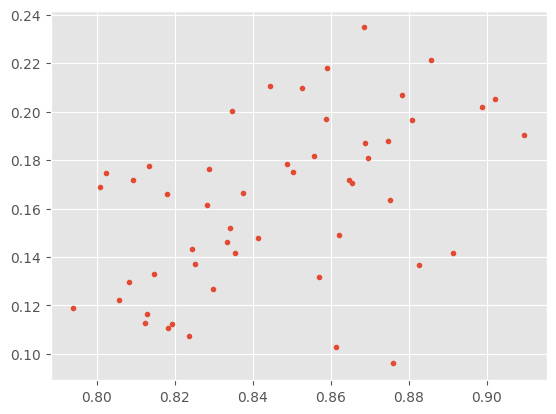

In [53]:
x = np.array(x)
plt.plot(x[:, 1], x[:, 0], '.')

In [54]:
np.corrcoef(x[:,1],x[:,0])

array([[1.        , 0.46858367],
       [0.46858367, 1.        ]])

In [55]:
maps.ind

{'Construction and mining': [1, 2, 3],
 'Finance and business services': [7, 8, 9, 12],
 'Manufacturing': [4],
 'Trade, transportation, and utilities': [5, 6],
 'Education and health': [10],
 'Leisure and hospitality': [11],
 'Public administration': [13],
 'Armed forces': [14]}

In [56]:
maps_income = {
    "less than 10k": [1,2,3],
    "10k-50k": [4,5,6,7,8,9,10,11],
    "50k-100k": [12, 13, 14],
    "above 100k": [15, 16]
}



## income

In [57]:
industry_jobid_mapping = {
    "less than 10k": [1,2,3],
    "10k-50k": [4,5,6,7,8,9,10,11],
    "50k-100k": [12, 13, 14],
    "above 100k": [15, 16]
}

# each industry has a list of job IDs we need to query in the "PRDTIND1" column

industry_concerns = {}
industry_concerns_count = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'HEFAMINC == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    industry_concerns[industry] = concerns[count_concern.index(max(count_concern))]
    industry_concerns_count[industry] = count_concern

    print(f"For income level: {industry}, highest concern: {CONCERNS_MAP[industry_concerns[industry]]}")

industry_activities = {}
industry_activities_count = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'HEFAMINC == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    industry_activities[industry] = activities[count_activities.index(max(count_activities))]
    industry_activities_count[industry] = count_activities

    print(f"For income level: {industry}, people hesitate to do: {ACTIVITIES_MAP[industry_activities[industry]]}")

# check if the distribution of concerns is different for different industries


less than 10k
[1165, 980, 560, 454, 553, 376, 69]
For income level: less than 10k, highest concern: Identity theft
10k-50k
[11009, 9367, 5518, 4105, 4838, 2869, 707]
For income level: 10k-50k, highest concern: Identity theft
50k-100k
[13400, 11231, 6946, 4879, 5954, 3335, 858]
For income level: 50k-100k, highest concern: Identity theft
above 100k
[14755, 11921, 7880, 5485, 6884, 3693, 1064]
For income level: above 100k, highest concern: Identity theft
less than 10k
[471, 373, 300, 257, 213]
For income level: less than 10k, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
10k-50k
[4659, 3479, 2903, 2718, 1973]
For income level: 10k-50k, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
50k-100k
[4593, 3403, 3578, 3439, 2292]
For income level: 50k-100k, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
above 100k

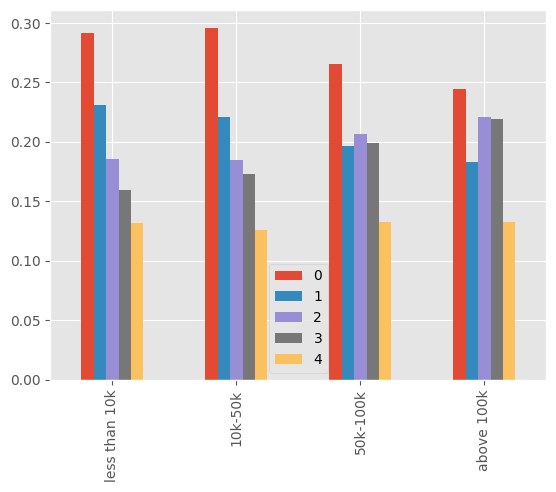

In [58]:
# plot a bar chart of concerns by education level using the education_educationid_mapping dictionary

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in industry_activities_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

# -- richer people are more hesitant to do express opinions, post photos!

In [59]:
df21

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXERNH1O,PXERNHRO,PXERN,PXPDEMP2,PXNMEMP2,PXERNWKP,PXERNRT,PXERNHRY,PXERNH2,PXERNLAB,PXERNCOV,PXNLFJH,PXNLFRET,PXNLFACT,PXSCHENR,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PXINWORK,PX

In [60]:
df21[AGE].value_counts()

PRTAGE
80    2424
85    2204
63    1487
60    1471
40    1447
      ... 
75     935
76     791
77     766
78     710
79     691
Name: count, Length: 72, dtype: int64

## Age vs types of concerns/activities - do we see a pattern?

In [61]:
age_groups = {
    '10-18':    [10, 18],
    '18-25':    [18, 25],
    '26-35':    [26, 35],
    '36-45':    [36, 45],
    '46-55':    [46, 55],
    '56-65':    [56, 65],
    '66+':    [66, 120],
}

# Plot a bar chart of concerns by age group

concerns_by_age = {}
age_concerns_count = {}

for age_group, age_range in age_groups.items():
    print(age_group)
    _df = df21.query('PRTAGE >= @age_range[0] and PRTAGE <= @age_range[1]')[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    concerns_by_age[age_group] = concerns[count_concern.index(max(count_concern))]
    age_concerns_count[age_group] = count_concern

    print(f"For age group: {age_group}, highest concern: {CONCERNS_MAP[concerns_by_age[age_group]]}")

activities_by_age = {}
age_activities_count = {}

for age_group, age_range in age_groups.items():
    print(age_group)
    _df = df21.query('PRTAGE >= @age_range[0] and PRTAGE <= @age_range[1]')[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    activities_by_age[age_group] = activities[count_activities.index(max(count_activities))]
    age_activities_count[age_group] = count_activities

    print(f"For age group: {age_group}, people hesitate to do: {ACTIVITIES_MAP[activities_by_age[age_group]]}")



10-18
[4897, 4041, 2419, 1754, 2214, 1482, 357]
For age group: 10-18, highest concern: Identity theft
18-25
[3703, 3182, 1993, 1416, 1721, 999, 228]
For age group: 18-25, highest concern: Identity theft
26-35
[5272, 4414, 2952, 2035, 2586, 1369, 331]
For age group: 26-35, highest concern: Identity theft
36-45
[5752, 4676, 2957, 2036, 2537, 1563, 414]
For age group: 36-45, highest concern: Identity theft
46-55
[5798, 4701, 2949, 2137, 2596, 1432, 348]
For age group: 46-55, highest concern: Identity theft
56-65
[6780, 5577, 3520, 2575, 2999, 1539, 397]
For age group: 56-65, highest concern: Identity theft
66+
[8665, 7339, 4383, 3171, 3815, 2035, 655]
For age group: 66+, highest concern: Identity theft
10-18
[1630, 1358, 1438, 1296, 881]
For age group: 10-18, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
18-25
[1237, 901, 941, 890, 631]
For age group: 18-25, people hesitate to do: Conducting financial transactions such as bank

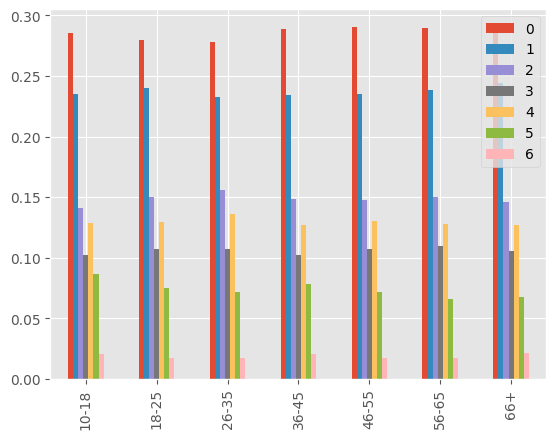

In [62]:
# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in age_concerns_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

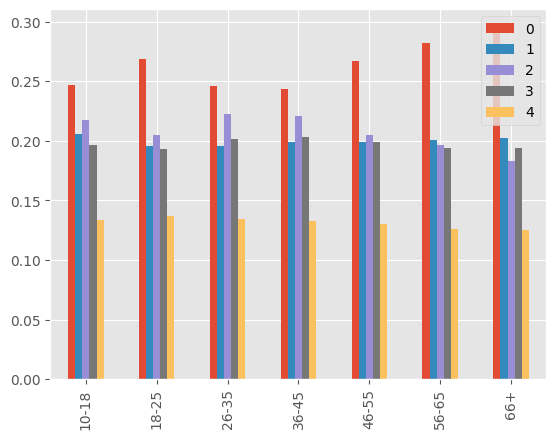

In [63]:
# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in age_activities_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

In [64]:
ACTIVITIES_MAP

{'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
 'HEPSPRE2': 'Buying goods or services online?',
 'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
 'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
 'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'}

## Industry vs concerns and activities?

In [65]:
industry_jobid_mapping = maps.ind

# each industry has a list of job IDs we need to query in the "PRDTIND1" column

industry_concerns = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'PRDTIND1 == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    industry_concerns[industry] = concerns[count_concern.index(max(count_concern))]

    print(f"For industry: {industry}, highest concern: {CONCERNS_MAP[industry_concerns[industry]]}")

industry_activities = {}

for industry, jobids in industry_jobid_mapping.items():
    query_string = ' or '.join([f'PRDTIND1 == {jobid}' for jobid in jobids])
    print(industry)
    _df = df21.query(query_string)[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    industry_activities[industry] = activities[count_activities.index(max(count_activities))]

    print(f"For industry: {industry}, people hesitate to do: {ACTIVITIES_MAP[industry_activities[industry]]}")

# check if the distribution of concerns is different for different industries


Construction and mining
[525, 467, 264, 195, 239, 130, 35]
For industry: Construction and mining, highest concern: Identity theft
Finance and business services
[459, 382, 256, 185, 224, 109, 43]
For industry: Finance and business services, highest concern: Identity theft
Manufacturing
[1557, 1298, 798, 609, 691, 369, 101]
For industry: Manufacturing, highest concern: Identity theft
Trade, transportation, and utilities
[262, 229, 138, 101, 127, 72, 21]
For industry: Trade, transportation, and utilities, highest concern: Identity theft
Education and health
[340, 277, 175, 136, 162, 78, 18]
For industry: Education and health, highest concern: Identity theft
Leisure and hospitality
[72, 54, 31, 18, 18, 18, 8]
For industry: Leisure and hospitality, highest concern: Identity theft
Public administration
[254, 192, 129, 116, 116, 71, 21]
For industry: Public administration, highest concern: Identity theft
Armed forces
[226, 196, 107, 101, 102, 60, 12]
For industry: Armed forces, highest concer

## Education vs concerns/activities

In [66]:
education_educationid_mapping = maps.educ

education_concerns = {}
education_concerns_count = {}

for education, educationids in education_educationid_mapping.items():
    query_string = ' or '.join([f'PEEDUCA == {educationid}' for educationid in educationids])
    print(education)
    _df = df21.query(query_string)[concerns]
    count_concern = [_df[concern].value_counts()[1] for concern in concerns]
    print(count_concern)
    education_concerns[education] = concerns[count_concern.index(max(count_concern))]
    education_concerns_count[education] = count_concern

    print(f"For education: {education}, highest concern: {CONCERNS_MAP[education_concerns[education]]}")

education_activities = {}
education_activities_count = {}

for education, educationids in education_educationid_mapping.items():
    query_string = ' or '.join([f'PEEDUCA == {educationid}' for educationid in educationids])
    print(education)
    _df = df21.query(query_string)[activities]
    count_activities = [_df[activity].value_counts()[1] for activity in activities]
    print(count_activities)
    education_activities[education] = activities[count_activities.index(max(count_activities))]
    education_activities_count[education] = count_activities

    print(f"For education: {education}, people hesitate to do: {ACTIVITIES_MAP[education_activities[education]]}")

LTHS
[3789, 3065, 1749, 1310, 1571, 1055, 266]
For education: LTHS, highest concern: Identity theft
HS
[9519, 7919, 4515, 3444, 4102, 2336, 539]
For education: HS, highest concern: Identity theft
SC
[10056, 8535, 5410, 3979, 4631, 2565, 677]
For education: SC, highest concern: Identity theft
COLL
[8719, 7259, 4841, 3273, 4091, 2178, 620]
For education: COLL, highest concern: Identity theft
ADV
[5554, 4508, 3048, 1934, 2615, 1307, 386]
For education: ADV, highest concern: Identity theft
LTHS
[1428, 1144, 979, 850, 652]
For education: LTHS, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
HS
[3539, 2569, 2324, 2193, 1487]
For education: HS, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
SC
[3652, 2596, 2643, 2592, 1759]
For education: SC, people hesitate to do: Conducting financial transactions such as banking, investing, or paying bills online?
COLL
[2997, 2250, 2483

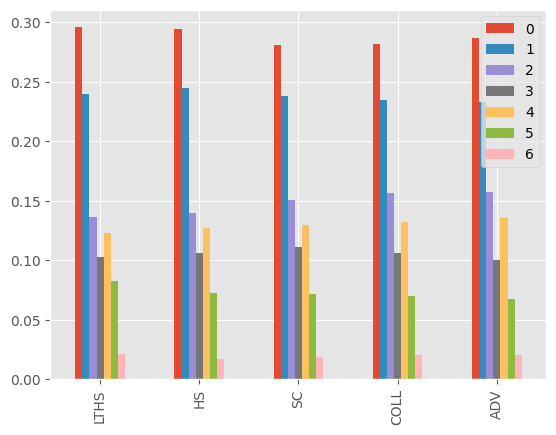

In [67]:
# plot a bar chart of concerns by education level using the education_educationid_mapping dictionary

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in education_concerns_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

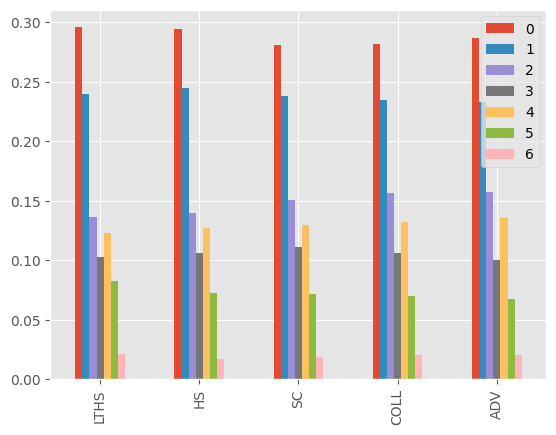

In [68]:
# plot a bar chart of concerns by education level using the education_educationid_mapping dictionary

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in education_concerns_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

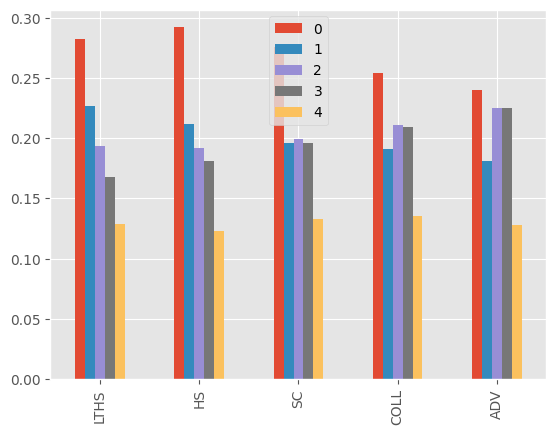

In [69]:
# plot a bar chart of concerns by education level using the education_educationid_mapping dictionary

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dictionary like this:
# education_educationid_mapping = {'High School': [1, 2, 3], 'Bachelor': [2, 3, 4], 'Master': [3, 4, 5]}

# normalize the counts by the number of people in each education level
education_concerns_count_normalized = {}
for education, count_concern in education_activities_count.items():
    education_concerns_count_normalized[education] = np.array(count_concern) / sum(count_concern)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(education_concerns_count_normalized, orient='index')

# Plot the DataFrame
df.plot(kind='bar')

# Show the plot
plt.show()

In [70]:
ACTIVITIES_MAP

{'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
 'HEPSPRE2': 'Buying goods or services online?',
 'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
 'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
 'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'}

In [71]:
education_concerns_count_normalized

{'LTHS': array([0.28260439, 0.22640016, 0.19374629, 0.1682169 , 0.12903226]),
 'HS': array([0.29218956, 0.2121037 , 0.19187583, 0.18106011, 0.12277081]),
 'SC': array([0.27578916, 0.19604289, 0.19959221, 0.19574082, 0.13283492]),
 'COLL': array([0.2543279 , 0.19093686, 0.21070944, 0.20892736, 0.13509844]),
 'ADV': array([0.24014811, 0.18143348, 0.22494049, 0.22533721, 0.1281407 ])}

In [72]:
l = []
for index in education_concerns_count_normalized.keys():
    print(index)
    l.append(education_concerns_count_normalized[index][2])
x = range(len(l))
print(stats.pearsonr(x, l))
print(stats.spearmanr(x, l))

LTHS
HS
SC
COLL
ADV
PearsonRResult(statistic=0.9348011107123382, pvalue=0.019787941974173537)
SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849874)


In [73]:
l

[0.19374628933306948,
 0.19187582562747688,
 0.1995922066153149,
 0.21070943652410049,
 0.22494049193335097]

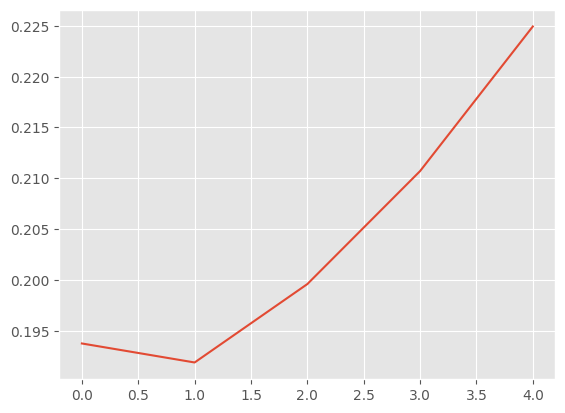

In [74]:
plt.plot(x, l)

In [75]:
# import scipy.stats as stats

# count_list = []
# x = []
# y = range(len(x))

# print(stats.pearsonr(x, y))
# print(stats.spearmanr(x, y))

In [76]:
ACTIVITIES_MAP

{'HEPSPRE1': 'Conducting financial transactions such as banking, investing, or paying bills online?',
 'HEPSPRE2': 'Buying goods or services online?',
 'HEPSPRE3': 'Posting photos, status updates, or other information on social networks?',
 'HEPSPRE4': 'Expressing an opinion on a controversial or political issue on a blog or social network, or in a forum, email or any other venue?',
 'HEPSPRE5': 'Searching for information using a platform such as Google Search, Yahoo Search, Microsoft Bing, or another web search engine?'}

In [77]:
df

,0,1,2,3,4
LTHS,0.282604,0.226400,0.193746,0.168217,0.129032
HS,0.292190,0.212104,0.191876,0.181060,0.122771
SC,0.275789,0.196043,0.199592,0.195741,0.132835
COLL,0.254328,0.190937,0.210709,0.208927,0.135098
ADV,0.240148,0.181433,0.224940,0.225337,0.128141


## take a specific concern, and see the demographics

In [78]:
# df21.query('HEPSCON1 == 1')['state'].value_counts()

In [79]:
# df21.query('HEPSCON2 == 1')['state'].value_counts()

In [80]:
_df = df21.query('state == "AL"')[concerns]
_df

,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8
0,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2
5,1,1,1,1,2,2,2
6,1,1,2,2,2,2,2
7,1,1,2,2,2,2,2
...,...,...,...,...,...,...,...
126581,2,2,2,2,2,2,2
126582,2,2,2,2,2,2,2
126583,2,2,2,2,2,2,2
126586,1,2,2,2,2,2,2


In [81]:
# df21.query(f'state == @statename')

In [82]:
df[EMAIL].value_counts()

KeyError: ignored

In [ ]:
df[SOCIALMEDIA].value_counts()

In [ ]:
df[TEXTING].value_counts()

In [ ]:
df[(df[EMAIL] == -1) * (df[SOCIALMEDIA] == -1)]

In [ ]:
df[SEX].value_counts()

In [ ]:
df[AGE]

In [ ]:
df21[CYBERCRIME].value_counts()/df21.shape[0]

In [ ]:
df19[CYBERCRIME].value_counts()/df19.shape[0]

In [ ]:
l = [f'HEPSCON{i}' for i in range(1, 9) if i!=7]
l

In [ ]:
for _l in l:
    print(df21[_l].value_counts()/df21.shape[0] )

# try classification

In [83]:
def has_any_concern(row):
    for column in [f'{item} == 1' for item in [f'HEPSCON{i}' for i in [1,2,3,4,5,6,8]]]:
            if (row['HEPSCON1'] == 1) or (row['HEPSCON2'] == 1) or (row['HEPSCON3'] == 1)\
                    or (row['HEPSCON4'] == 1) or (row['HEPSCON5'] == 1) or (row['HEPSCON6'] == 1)\
                    or (row['HEPSCON8'] == 1):
                return 1
            else:
                return 0

def hesitates_to_do_activity(row):
    for column in [f'{item} == 1' for item in [f'HEPSPRE{i}' for i in [1,2,3,4,5]]]:
            if (row['HEPSPRE1'] == 1) or (row['HEPSPRE2'] == 1) or (row['HEPSPRE3'] == 1)\
                    or (row['HEPSPRE4'] == 1) or (row['HEPSPRE5'] == 1):
                return 1
            else:
                return 0

df21['HAS_SOME_CONCERN'] = df21.apply(has_any_concern, axis=1)
df21['HESITATES'] = df21.apply(hesitates_to_do_activity, axis=1)

In [84]:
df21['HAS_SOME_CONCERN'].value_counts()

HAS_SOME_CONCERN
1    55588
0    35353
Name: count, dtype: int64

In [85]:
df21['HESITATES'].value_counts()

HESITATES
0    66315
1    24626
Name: count, dtype: int64

In [86]:
PERSONTYPE = 'PRPERTYP'
SEX = 'PESEX'
AGE = 'PRTAGE'
STATECODE = 'GESTFIPS'
SOCIALMEDIA = 'PESOCIAL'
TEXTING = 'PETEXTIM'
EMAIL = 'PEEMAIL'





# During the past year, (have you/has any member of your household) been affected by an
# online security breach, identity theft, or a similar crime?
CYBERCRIME='HEPSCYBA'


In [87]:
df21['PRUNTYPE'].value_counts()

PRUNTYPE
-1    89117
 5      557
 2      510
 4      246
 1      225
 3      169
 6      117
Name: count, dtype: int64

In [88]:
df21['HESITATES']

0         0
1         0
5         0
6         1
7         1
         ..
127369    1
127370    1
127372    0
127373    0
127374    0
Name: HESITATES, Length: 90941, dtype: int64

In [89]:
df21 = df21.assign(EDUC_LEVEL=lambda x: pd.Categorical(x['PEEDUCA'].map(maps.educ)))

In [90]:
maps.EducDTMap.keys()

dict_keys([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [91]:
filter_variables = [
    PERSONTYPE, SEX, AGE, STATECODE, SOCIALMEDIA, TEXTING, EMAIL, CYBERCRIME,
    'HAS_SOME_CONCERN', 'HESITATES',
    'state',



#     *list(CONCERNS_MAP.keys()),
#     *list(ACTIVITIES_MAP.keys()),

]

In [92]:
filter_variables

['PRPERTYP',
 'PESEX',
 'PRTAGE',
 'GESTFIPS',
 'PESOCIAL',
 'PETEXTIM',
 'PEEMAIL',
 'HEPSCYBA',
 'HAS_SOME_CONCERN',
 'HESITATES',
 'state']

In [93]:
# df21['state']
maps.ind

{'Construction and mining': [1, 2, 3],
 'Finance and business services': [7, 8, 9, 12],
 'Manufacturing': [4],
 'Trade, transportation, and utilities': [5, 6],
 'Education and health': [10],
 'Leisure and hospitality': [11],
 'Public administration': [13],
 'Armed forces': [14]}

In [94]:
# New variables to add
state = lambda x: pd.Categorical(x['GESTFIPS'].map(maps.StatesMap))
region = lambda x: pd.Categorical(x['STATE'].map(maps.RegionsMap))
educdt = lambda x: pd.Categorical(x['PEEDUCA'].map(maps.EducDTMap))
educ = lambda x: pd.Categorical(x['PEEDUCA'].map(maps.educ))
schenr = lambda x: pd.Categorical(
    np.where(x['PESCHENR'] == 1, 1,
    np.where(x['PESCHENR'] == 2, 0, None)))
married = lambda x: pd.Categorical(
    np.where(x['PRMARSTA'].isin([1, 2, 3]), 1, 0))
# wbhao = lambda x: pd.Categorical(
#     np.where(x['PRDTHSP'].isin(maps.hispanic), 'Hispanic',
#              x['PRDTRACE'].map(maps.race)))
wbao = lambda x: pd.Categorical(x['PRDTRACE'].map(maps.race))

veteran = lambda x: pd.Categorical(
    np.where(x['PEAFEVER'] == 1, 1,
    np.where(x['PEAFEVER'] == 2, 0, None)))
forborn = lambda x: pd.Categorical(
    np.where(x['PRCITSHP'].isin([4, 5]), 1,
    np.where(x['PRCITSHP'].isin([1, 2, 3]), 0, None)))

citizen = lambda x: pd.Categorical(
    np.where(x['PRCITSHP'].isin([1, 2, 3, 4]), 1,
    np.where(x['PRCITSHP'].isin([5]), 0, None)))

indgrp =  lambda x: pd.Categorical(x['PRMJIND1'].map(maps.ind))

manager = lambda x: np.where(x.PRDTOCC1 == 1, 1,
                    np.where(x.PRDTOCC1 > 0, 0, None))

mjh = lambda x: pd.Categorical(
    np.where(x['PRSJMJ']==2, 1, np.where(x['PRSJMJ']==1, 0, None)))

numjobs = lambda x: np.where(x.PEMJNUM > 1, x.PEMJNUM,
    np.where((x.MJH == 0) & (x.LFS == "Employed"), 1, 0))

unemptype = lambda x: pd.Categorical(
    np.where(x['PRUNTYPE'].isin([1, 2, 3]), 'Job Loser',
    np.where(x['PRUNTYPE'] == 4, 'Job Leaver',
    np.where(x['PRUNTYPE'] == 5, 'Re-entrant',
    np.where(x['PRUNTYPE'] == 6, 'New Entrant', None)))))

layoff = lambda x: pd.Categorical(
    np.where(x['PEMLR'] == 3, 'Layoff',
    np.where(x['PEMLR'] == 4, 'Looking', None)))

lfs = lambda x: pd.Categorical(
        np.where(x['PEMLR'].isin([1, 2]), 'Employed',
        np.where(x['PEMLR'].isin([3, 4]), 'Unemployed',
        np.where(x['PEMLR'].isin([5, 6, 7]), 'NILF', np.nan))))


school = lambda x: pd.Categorical(
        np.where(x.PESCHLVL == 1, 'High School',
        np.where((x.PESCHLVL == 2) & (x.PESCHFT == 1), 'Full-time College',
        np.where((x.PESCHLVL == 2) & (x.PESCHFT == 2), 'Part-time College',
        np.where(x.SCHENR == 0, 'Not Enrolled', None)))))

uslft = lambda x: pd.Categorical(
        np.where((x['PEHRFTPT'] == 1) | (x['PEHRUSL1'] >= 35), 1,
        np.where(x['PEHRFTPT'] == 2, 0,
        np.where(x['PEHRFTPT'] == 3, -4, None))))

In [98]:
df21 = (df21.assign(STATE = state(df21),
                    EDUCDT = educdt(df21),
#                     EDUC = educ,
                    SCHENR = schenr(df21),
#                     RETIRED = retired,
                    MARRIED = married(df21),
#                     WBHAO = wbhao,
#                     WBAO = wbao,
#                     HISPANIC = hispanic,
                    VETERAN = veteran(df21),
                    FORBORN = forborn(df21),
                    CITIZEN = citizen(df21),
                    UNEMPTYPE = unemptype(df21),
#                     JLTYPE = jltype,
                    LAYOFF = layoff(df21),
#                     PTECON = ptecon,
                    USLFT = uslft(df21),
#                     WORKFT = workft,
#                     FTLF = ftlf,
#                     SAMEEMP = sameemp,
                   )
       )



df21 = df21.assign(REGION = region(df21), SCHOOL = school(df21))


In [99]:
df21

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HUTYPEA,HUTYPB,HUTYPC,HWHHWGT,HRINTSTA,HRNUMHOU,HRHTYPE,HRMIS,HUINTTYP,HUPRSCNT,HRLONGLK,HRHHID2,HWHHWTLN,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTCBSAST,GTMETSTA,GTINDVPC,GTCBSASZ,GTCSA,PERRP,PRTAGE,PRTFAGE,PEMARITL,PESPOUSE,PESEX,PEAFEVER,PEAFNOW,PEEDUCA,PTDTRACE,PRDTHSP,PUCHINHH,PULINENO,PRFAMNUM,PRFAMREL,PRFAMTYP,PEHSPNON,PRMARSTA,PRPERTYP,PENATVTY,PEMNTVTY,PEFNTVTY,PRCITSHP,PRCITFLG,PRINUYER,PUSLFPRX,PEMLR,PUWK,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PURETOT,PUDIS,PERET1,PUDIS1,PUDIS2,PUABSOT,PULAY,PEABSRSN,PEABSPDO,PEMJOT,PEMJNUM,PEHRUSL1,PEHRUSL2,PEHRFTPT,PEHRUSLT,PEHRWANT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PUHRCK1,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHRCK12,PULAYDT,PULAY6M,PELAYAVL,PULAYAVR,PELAYLK,PELAYDUR,PELAYFTO,PULAYCK1,PULAYCK2,PULAYCK3,PULK,PELKM1,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PELKAVL,PULKAVR,PELKLL1O,PELKLL2O,PELKLWO,PELKDUR,PELKFTO,PEDWWNTO,PEDWRSN,PEDWLKO,PEDWWK,PEDW4WK,PEDWLKWK,PEDWAVL,PEDWAVR,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PEJHWKO,PUJHDP1O,PEJHRSN,PEJHWANT,PUJHCK1,PUJHCK2,PRABSREA,PRCIVLF,PRDISC,PREMPHRS,PREMPNOT,PREXPLF,PRFTLF,PRHRUSL,PRJOBSEA,PRPTHRS,PRPTREA,PRUNEDUR,PRUNTYPE,PRWKSCH,PRWKSTAT,PRWNTJOB,PUJHCK3,PUJHCK4,PUJHCK5,PUIODP1,PUIODP2,PUIODP3,PEIO1COW,PUIO1MFG,PEIO2COW,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PRIOELG,PRAGNA,PRCOW1,PRCOW2,PRCOWPG,PRDTCOW1,PRDTCOW2,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRSJMJ,PRERELG,PEERNUOT,PEERNPER,PEERNRT,PEERNHRY,PTERNH1C,PTERNH2,PTERNH1O,PTERNHLY,PTHR,PEERNHRO,PTERNWA,PTWK,PTERN,PTERN2,PTOT,PEERNWKP,PEERNLAB,PEERNCOV,PENLFJH,PENLFRET,PENLFACT,PUNLFCK1,PUNLFCK2,PESCHENR,PESCHFT,PESCHLVL,PRNLFSCH,PWFMWGT,PWLGWGT,PWORWGT,PWSSWGT,PWVETWGT,PRCHLD,PRNMCHLD,PXPDEMP1,PRWERNAL,...,PXSCHFT,PXSCHLVL,QSTNUM,OCCURNUM,PEDIPGED,PEHGCOMP,PECYC,PXDIPGED,PXHGCOMP,PXCYC,PWCMPWGT,PEIO1ICD,PTIO1OCD,PEIO2ICD,PTIO2OCD,PRIMIND1,PRIMIND2,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXAFEVER,PEPAR2,PEPAR1,PEPAR2TYP,PEPAR1TYP,PECOHAB,PXPAR2,PXPAR1,PXPAR2TYP,PXPAR1TYP,PXCOHAB,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,HXFAMINC,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,HEDESKTP,PEDESKTP,HELAPTOP,PELAPTOP,HETABLET,PETABLET,HEMPHONE,PEMPHONE,HEWEARAB,PEWEARAB,HETVBOX,PETVBOX,HEDEVQUA,HEDEVSTA,HEINHOME,PEINHOME,HEINWORK,PEINWORK,HEINSCHL,PEINSCHL,HEINCAFE,PEINCAFE,HEINTRAV,PEINTRAV,HEINLICO,PEINLICO,HEINELHO,PEINELHO,HEINOTHR,PEINOTHR,HENETCHK,PENETCK2,HEMOBDAT,HEHMINT1,HEHMINT2,HEHOMTE1,HEHOMTE2,HEHOMTE3,HEHOMTE4,HEHNETQL,HEHNETST,PEEMAIL,PETEXTIM,PESOCIAL,PEGAMING,PECONFER,PEVIDEO,PEAUDIO,PEPUBLISH,PETELEWK,PEJOBSCH,PEEDTRAI,PEEGOVTS,PEUSESVC,PEESRVCS,PEECOMME,PEEGOODS,PEFINANC,PEVOICEA,PEHOMIOT,HEMEDREC,HEMEDDOC,HEMEDINF,HEMEDMON,HEPSPRE1,HEPSPRE2,HEPSPRE3,HEPSPRE4,HEPSPRE5,HEPSCON1,HEPSCON2,HEPSCON3,HEPSCON4,HEPSCON5,HEPSCON6,HEPSCON8,HEPSCYBA,HEEVRHOM,HENOHM1,HENOHM2,HENOHM3,HENOHM4,HENOHM5,HENOHM6,HENOHM7,HENOHM8,HENOHM9,HENOHM10,HEPRINOH,HELOPRCE,HETRADTV,HEPREVTV,HENOTV1,HENOTV2,HENOTV3,HENOTV4,HENOTV5,HENOTV6,HENOTV7,HENOTV8,HENOTV9,HENOTV10,HENOTV11,HENOTV12,PUELGFLG,HXDESKTP,HXLAPTOP,HXTABLET,HXMPHONE,HXWEARAB,HXTVBOX,HXDEVQUA,HXDEVSTA,HXINHOME,HXINWORK,HXINSCHL,HXINCAFE,HXINTRAV,HXINLICO,HXINELHO,HXINOTHR,HXHOMTE1,HXHOMTE2,HXHOMTE3,HXHOMTE4,HXMOBDAT,HXHNETQL,HXHNETST,HXPSPRE1,HXPSCON1,HXMEDREC,HXMEDDOC,HXMEDINF,HXMEDMON,HXPSCYBA,HXNOHM1,HXEVRHOM,HXPRINOH,HXLOPRCE,HXNOTV1,HXTRADTV,HXPREVTV,PXDESKTP,PXLAPTOP,PXTABLET,PXMPHONE,PXWEARAB,PXTVBOX,PXINHOME,PXINWORK,PXINSCHL,PXINCAFE,PXINTRAV,PXINLICO,PXINELHO,PXINOTHR,PXNETCK2,PXEMAIL,PXTEXTIM,PXSOCIAL,PXGAMING,PXCONFER,PXVIDEO,PXAUDIO,PXPUBLIS

In [100]:
import xgboost as xgb

In [101]:
df_train = df21[['STATE', 'REGION', 'EDUCDT', 'SCHENR', 'SCHOOL', 'MARRIED', 'VETERAN', 'FORBORN', 'CITIZEN', 'UNEMPTYPE', 'LAYOFF', 'USLFT']].copy()

df_train['STATE'] = state(df21)
df_train['REGION'] = region(df21)
df_train['EDUCDT'] = educdt(df21)
df_train['SCHENR'] = schenr(df21)
df_train['SCHOOL'] = school(df21)
df_train['MARRIED'] = married(df21)
df_train['VETERAN'] = veteran(df21)
df_train['FORBORN'] = forborn(df21)
df_train['CITIZEN'] = citizen(df21)
df_train['UNEMPTYPE'] = unemptype(df21)
df_train['LAYOFF'] = layoff(df21)
df_train['USLFT'] = uslft(df21)

In [153]:
# check datatypes of df_train

# loop through all columns in df21, and add all non numerical and non categorical columns to a list
non_numerical_cols = []
for col in df21.columns:
    if df21[col].dtype == object:
        non_numerical_cols.append(col)

# add columns that contain all NaN values to the list
for col in df21.columns:
    if df21[col].isnull().all():
        non_numerical_cols.append(col)

non_numerical_cols += ["HAS_SOME_CONCERN", "HESITATES"] + ["HEPSCON" + str(i) for i in range(1, 9)] + ["HEPSPRE" + str(i) for i in range(1, 6)]

# drop all non numerical and non categorical columns from df21
df_train1 = df21.drop(columns = non_numerical_cols, errors="ignore")



In [154]:
print("HAS_SOME_CONCERN" in df_train1.columns)

False


In [157]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

# reference: https://www.kaggle.com/code/tilii7/bayesian-optimization-of-xgboost-parameters

xgtrain = xgb.DMatrix(df_train1, label=df21['HESITATES'], enable_categorical=True)

def xgb_evaluate(max_depth, gamma, colsample_bytree):
    """
    Hyperparm seach for binary classification
    """
    params = {'eval_metric': 'error',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'tree_method': 'gpu_hist',
              'predictor': 'gpu_predictor',
              'verbosity': 0}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, xgtrain, num_boost_round=100, nfold=3)

    return -cv_result['test-error-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (7, 12),
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.5, 0.9)})
xgb_bo.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
| 1         | -0.2022   | 0.6681    | 0.6554    | 10.77     |
| 2         | -0.2165   | 0.5977    | 0.294     | 8.311     |
| 3         | -0.2059   | 0.8998    | 0.6975    | 9.812     |
| 4         | -0.1891   | 0.5858    | 0.199     | 10.57     |
| 5         | -0.1882   | 0.599     | 0.2126    | 10.46     |
| 6         | -0.1788   | 0.9       | 0.0       | 10.39     |
| 7         | -0.1541   | 0.9       | 0.0       | 12.0      |
| 8         | -0.1875   | 0.9       | 0.6582    | 12.0      |
| 9         | -0.179    | 0.5232    | 0.03628   | 11.91     |
| 10        | -0.2023   | 0.6584    | 0.4195    | 9.944     |
| 11        | -0.1648   | 0.9       | 0.0       | 11.62     |
| 12        | -0.2293   | 0.9       | 1.0       | 7.0       |
| 13        | -0.1582   | 0.9       | 0.1048    | 12.0      |
| 14        | -0.1648   | 0.9       | 0.0       | 11.94     |
| 15    

In [158]:
sorted_res = sorted(xgb_bo.res,key = lambda x: x['target'])
params = sorted_res[-1]
params['params']['max_depth'] = int(params['params']['max_depth'])
model = xgb.train(params, xgtrain, num_boost_round=1000)


<Axes: >

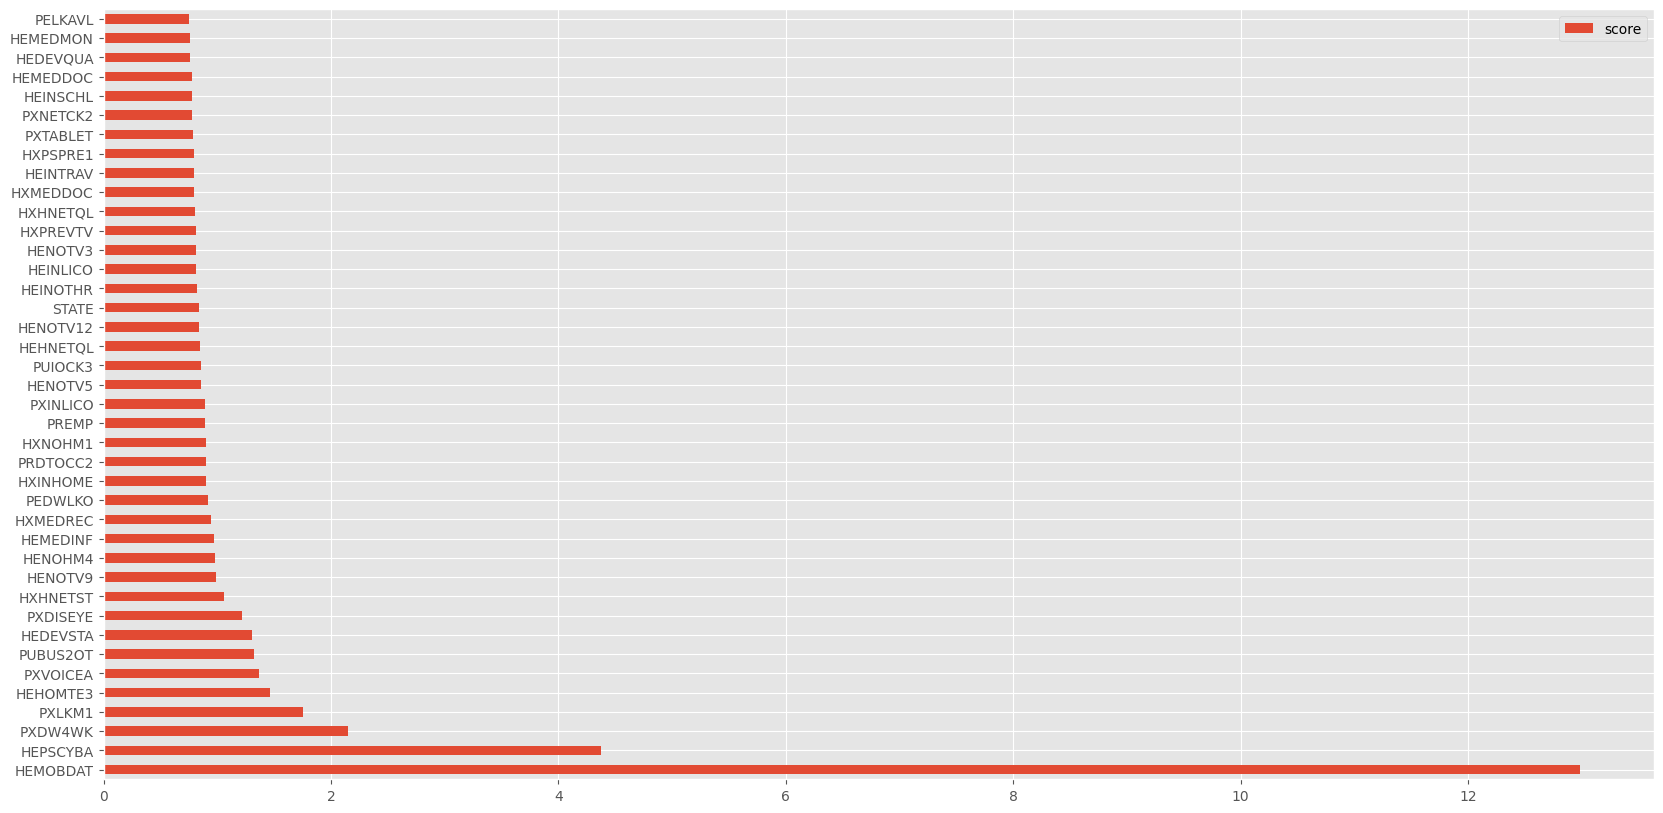

In [162]:
feature_important = model.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

<Axes: xlabel='X'>

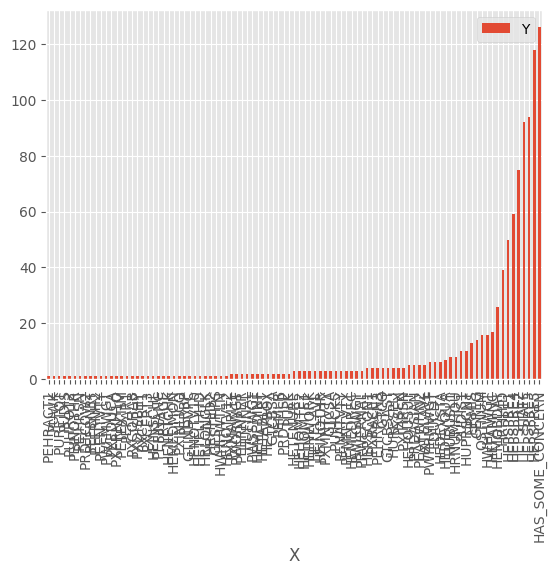

In [124]:
#Feature Importance
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

In [163]:
# Evaluate model on training set
y_pred = model.predict(xgtrain)
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(df21['HESITATES'], y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

0.9975918452623129

In [164]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

# reference: https://www.kaggle.com/code/tilii7/bayesian-optimization-of-xgboost-parameters

xgtrain = xgb.DMatrix(df_train1, label=df21['HAS_SOME_CONCERN'], enable_categorical=True)

def xgb_evaluate(max_depth, gamma, colsample_bytree):
    """
    Hyperparm seach for binary classification
    """
    params = {'eval_metric': 'error',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'tree_method': 'gpu_hist',
              'predictor': 'gpu_predictor',
              'verbosity': 0}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, xgtrain, num_boost_round=100, nfold=3)

    return -cv_result['test-error-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (7, 12),
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.5, 0.9)})
xgb_bo.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
| 1         | -0.1569   | 0.5605    | 0.4441    | 11.75     |
| 2         | -0.1755   | 0.5424    | 0.4882    | 9.495     |
| 3         | -0.1657   | 0.8389    | 0.1875    | 9.773     |
| 4         | -0.1573   | 0.6124    | 0.2556    | 10.3      |
| 5         | -0.1794   | 0.5027    | 0.8325    | 10.95     |
| 6         | -0.1757   | 0.8248    | 0.9341    | 10.95     |
| 7         | -0.1555   | 0.5584    | 0.4095    | 11.72     |
| 8         | -0.1421   | 0.5506    | 0.0       | 11.78     |
| 9         | -0.1331   | 0.9       | 0.0       | 11.47     |
| 10        | -0.1446   | 0.9       | 0.0       | 10.97     |
| 11        | -0.1949   | 0.9       | 0.0       | 7.0       |
| 12        | -0.1217   | 0.9       | 0.0       | 12.0      |
| 13        | -0.1275   | 0.9       | 0.1469    | 12.0      |
| 14        | -0.1331   | 0.9       | 0.0       | 11.88     |
| 15    

<Axes: >

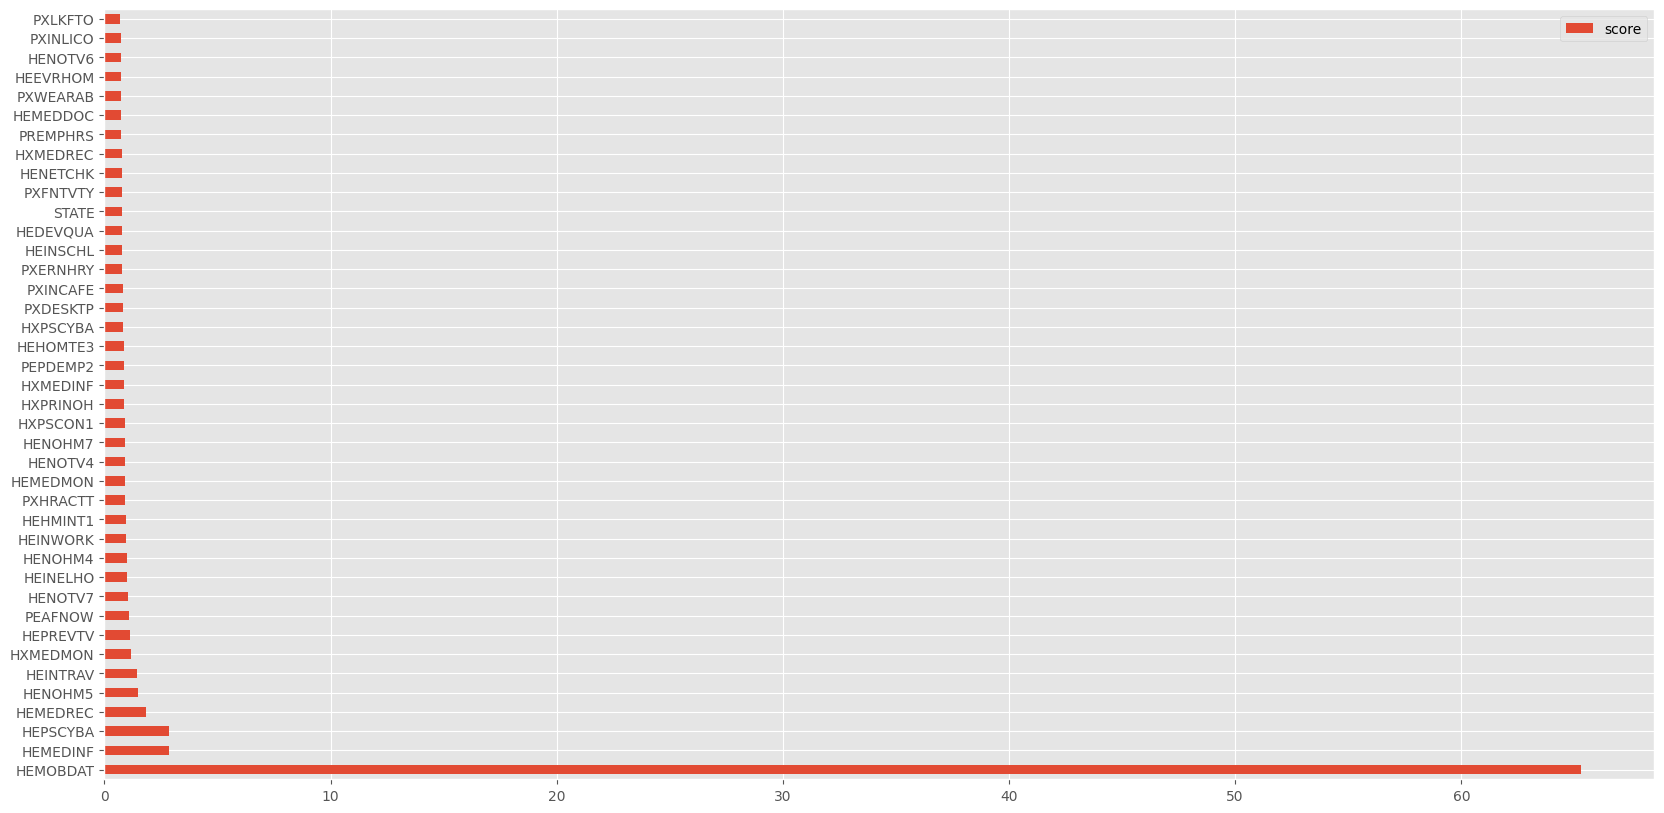

In [166]:
sorted_res = sorted(xgb_bo.res,key = lambda x: x['target'])
params = sorted_res[-1]
params['params']['max_depth'] = int(params['params']['max_depth'])
model = xgb.train(params, xgtrain, num_boost_round=1000)

# Reference: https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost

feature_important = model.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [167]:
# Evaluate model on training set
y_pred = model.predict(xgtrain)
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(df21['HAS_SOME_CONCERN'], y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

0.9980096985957929

## Categorising top-20 important features for each type of hesitation.

In [32]:
feat_dict = {
    
    'HEPSPRE1' : 
    
    {
        'HENOHM8' : 'Safety',
        'PUBUSCK2' : 'Work',
        'PULAYCK1' : 'Work', #NOTE: Some work related thing, layoff related (I checked similar prefixes)
        'PEDWLKO' : 'Work',
        'HEPSCYBA' : 'Safety', #Affected by online security breach?
        'PEPDEMP2' : 'Work',
        'HUBUSL3' : 'Work', #Have a business or a farm
        'HEEVRHOM' : 'Digital access', #Ever used the Internet from home?
        'HEHOMTE3' : 'Digital access', #Using internet via dial-up?
        'PELAYDUR' : 'Work', #Layoff period
        'HENOTV3' : 'Financial', #No subscription to TV channels service, why? -> Can't afford it
        'HEHNETST' : 'Financial', # Temporarily lose internet access due to non-payment
        'HETRADTV' : 'Digital access', #Cable TV/Satellite TV
        'HXTVBOX' : 'Digital access', #Smart TV/Game system (XBOX, etc)
        'PXMPHONE' : 'Digital access', #Who uses a cellular phone or smartphone?
        'PXMLR' : 'Work', #Major Labor Force Recode
        'HEDEVSTA' : 'Digital access', #How often is internet inaccessible?
        'PXNETCK2' : 'Digital access', #Who uses internet from any location, for any purpose.
        'HENOTV10' : 'Digital access', #Do dot subscibe to TV due to poor customer servcie.
        'PXWEARAB' : 'Digital access', #Who uses a wearable Internet-connected device such as a smart watch or glasses?
    
    },
    
    'HEPSPRE2':
    {
        'HEHOMTE3' : 'Digital access', #Using internet via dial-up?
        'HEPRINOH' : 'Digital access', #Of the reasons you just listed for not going online at home, which (do you/does your household) consider to be the most important?
        'HEPSCYBA' : 'Safety', #Affected by online security breach?
        'HXTENURE' : 'House', #Owned or rented house
        'HXHNETQL' : 'Digital access', #Access the Internet from their homes, other than a mobile data plan.
        'HXPSCON1' : 'Safety', #Identity theft concern
        'PXERNPER' : 'Work', #Periodicity of earnings
        'PUDWCK5' : 'Work', #Passive job seekers
        'HENOTV11' : 'Digital access', #Do dot subscibe to TV due to poor quality
        'HEEVRHOM' : 'Digital access', #Ever used the Internet from home?
        'PXLKM1' : 'Work', #What all have you done to find work in the last 4 weeks?
        'PXHSPNON': 'Demographic', #Hispanic?
        'HEINSCHL' : 'Digital access', #Use internet at school?
        'HENOTV8' : 'Digital access' , #Do dot subscibe to TV due not having a TV or broken TV
        'HEDEVSTA' : 'Digital access', #How often is internet inaccessible?
        'HXINWORK' : 'Digital access', #Use internet at work?
        'HENOHM3' : 'Digital access', #Don't use intenet at home? ->Not worth the cost
        'PXINSCHL' : 'Digital access', #Use internet at school(again-> Look HEINSCHL)
        'PXNETCK2' : 'Digital access', #Who uses internet from any location, for any purpose.
        'PRHERNAL': 'Financial', # HOURLY EARNINGS
        
    },
    
    'HEPSPRE3' : 
    {
        
        'HXEVRHOM' : 'Digital access', #Ever used the Internet from home?
        'PREXPLF' : 'Work', #EXPERIENCED LABOR FORCE EMPLOYMENT
        'HXPRINOH' : 'Digital access', #Of the reasons you just listed for not going online at home, which (do you/does your household) consider to be the most important?
        'HEPSCYBA' : 'Safety', #Affected by online security breach?
        'HXTENURE' : 'House', #Owned or rented house
        'HENOHM5' : 'Digital access', #Do not use the internet at home? ->No computing device, or device inadequate or broken
        'PRDTCOW2' : 'Work', #DETAILED CLASS OF WORKER RECODE - JOB 2
        'PXDWLKO' : 'Work', #Did you look for work at any time in the last 12 months?
        'HEHOMTE3' : 'Digital access', #Using internet via dial-up?
        'HEPRINOH' : 'Digital access', #Of the reasons you just listed for not going online at home, which (do you/does your household) consider to be the most important?
        'HXHNETQL' : 'Digital access', #Access the Internet from their homes, other than a mobile data plan.
        'PXINOTHR' : 'Digital access', #Who uses internet at other places not covered in the survey
        'HENOHM4' : 'Digital access', #Dont use internet at home -> Can use it elsewhere
        'HXLOPRCE' : 'Financial', #At what price would you buy home internet service
        'HXINHOME' : 'Digital access', #Use internet at home?
        'BUSL1' : 'Financial', #
        'PXMPHONE' : 'Digital access', #Who uses a cellular phone or smartphone?
        'HEINSCHL' : 'Digital access', #Use internet at school?
        'HEDEVSTA' : 'Digital access', #How often is internet inaccessible?
        'PXINELHO': 'Digital access', # Who uses the Internet at someone else's home? 
        'HUBUSL2'  : 'Financial', # Have a business or a farm
        
    },

    'HEPSPRE4': {
        "PXMLR"    : 'Work', #Major Labor Force Recode
        "HENOHM10" : 'Digital access', # reason for not using internet at home - some other reason
        "HXPRINOH" : 'Digital access', # reason for not using internet at home - most important reason
        "HXNOHM1"  : 'Digital access', # # reason for not using internet at home - don't need it
        "HEPSCYBA" : 'Safety', #Affected by online security breach?
        "PRSJMJ"   : 'Work', # single job or multiple jobs
        "PTNMEMP2" : 'Work', # NOTE: Can also be financial # number of paid employees.
        "HEMEDINF" : 'Digital access', # Do you use the internet to get information about health or medical topics?
        "PEDWLKWK" : 'Work', # since you left your job, have you looked for work?
        "HENOTV10" : 'Digital access', #Do dot subscibe to TV due to poor customer servcie.
        "PXLKLL2O" : 'Work', # Did you lose your job or quit, or was it temporary?
        "PXEGOVTS" : 'Digital access', # use of internet for accessing govt services like regestering to vote, paying taxes, etc.
        "HENOTV7"  : 'Digital access', # Do dot subscibe to TV since not available in area
        "HENOTV5"  : 'Digital access', # Do dot subscibe to TV since can watch at another location
        "HXINOTHR" : 'Digital access', # use internet at some other location
        "PXIO2ICD" : 'Work', # industry code of job 2
        "HENOHM7"  : 'Safety', # Do not use internet at home -> privacy or cybersecurity concerns
        "HEMEDREC" : 'Digital access', # Do you use the internet to get information about health (/insurance) records?
        "PXERNHRY" : 'Financial', # hourly/non-hourly earnings
        "PXDISREM" : 'Disability', 
    },

    'HEPSPRE5' : {
        'HENOHM6'  : 'Digital access', # Do not use internet at home -> 
        'PXIO2ICD' : 'Work', # industry code of job 2
        'PELKAVL'  : 'Work', # LAST WEEK, COULD YOU HAVE STARTED A JOB IF ONE HAD BEEN OFFERED? 
        'PXERN'    : 'Financial', # weekly overtime earnings
        'HXINELHO' : 'Digital access', # Who uses the Internet at someone else's home? 
        'HXLOPRCE' : 'Financial', #At what price would you buy home internet service
        'PELAYLK'  : 'Work', # even though you are to be called back to work, have you been looking for work?
        'HXEVRHOM' : 'Digital access', #Ever used the Internet from home?
        'PXDISEYE' : 'Disability', # is blind or difficulty seeing even when wearing glasses
        'HEPRINOH' : 'Digital access', #Of the reasons you just listed for not going online at home, which (do you/does your household) consider to be the most important?
        'HENOTV9'  : 'Digital access', # moving or in process of moving
        'HEPSCYBA' : 'Safety', # Affected by online security breach?
        'PULAYCK2' : 'Work', # dependent layoff
        'PXDISREM' : 'Disability', # any disability condition
        'PRDTCOW2' : 'Work', # DETAILED CLASS OF WORKER RECODE - JOB 2
        'HUBUSL2'  : 'Financial', # Have a business or a farm
        'HXPSPRE1' : 'Safety', # Privacy concerns
        'PUJHCK5'  : 'Work', # NILF - passive job seekers
        'PXINHOME' : 'Digital access', # Use internet at home?
        'PXINSCHL' : 'Digital access', # Use internet at school(again-> Look HEINSCHL)
    }
   
    
}

# NOTE: Can also be financial: PTNMEMP2
# TODO discuss: PXDISREM BECAUSE OF A PHYSICAL, MENTAL, OR EMOTIONAL CONDITION,DOES HAVE SERIOUS DIFFICULTY CONCENTRATING, REMEMBERING, OR MAKING DECISIONS?
# collapse work and financial?
# disability

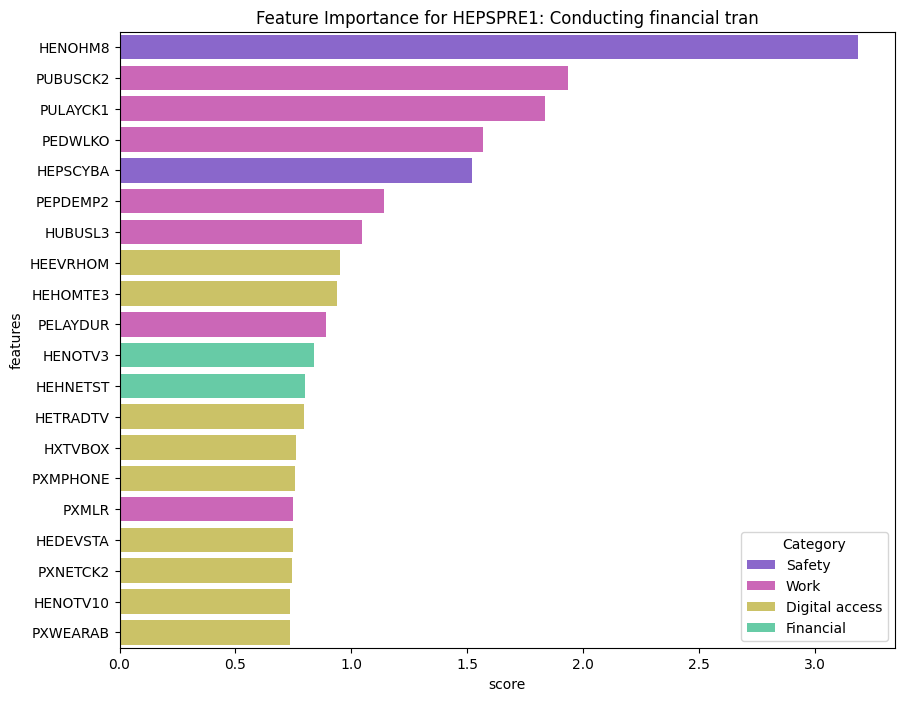

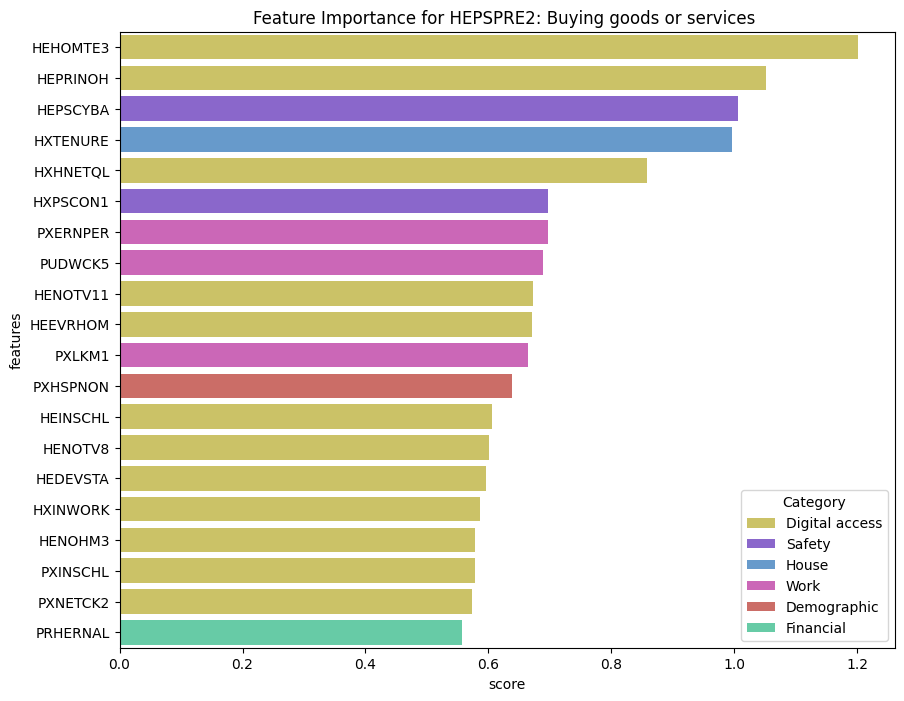

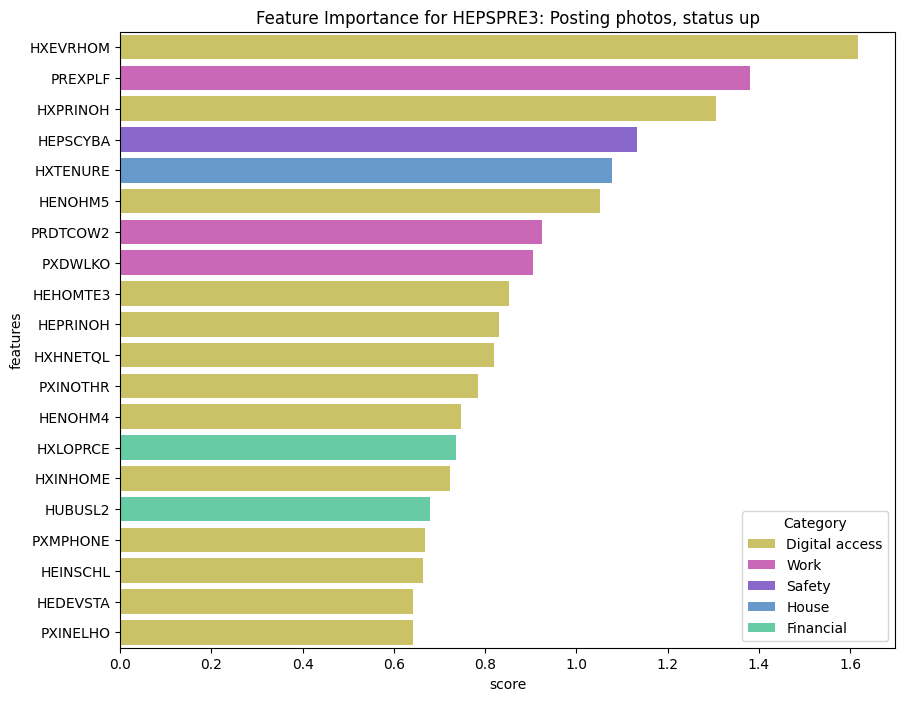

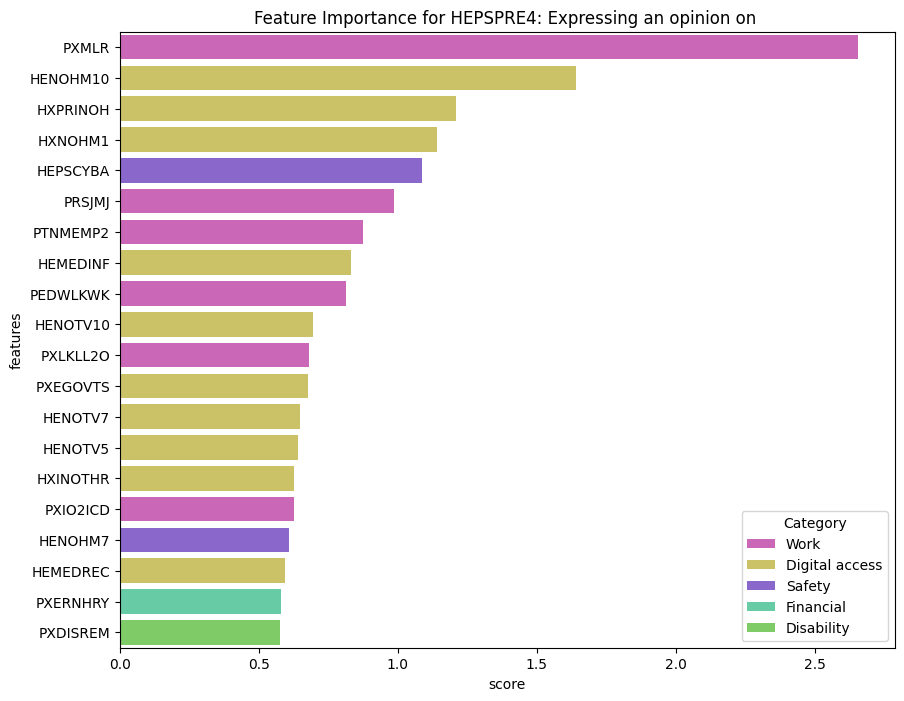

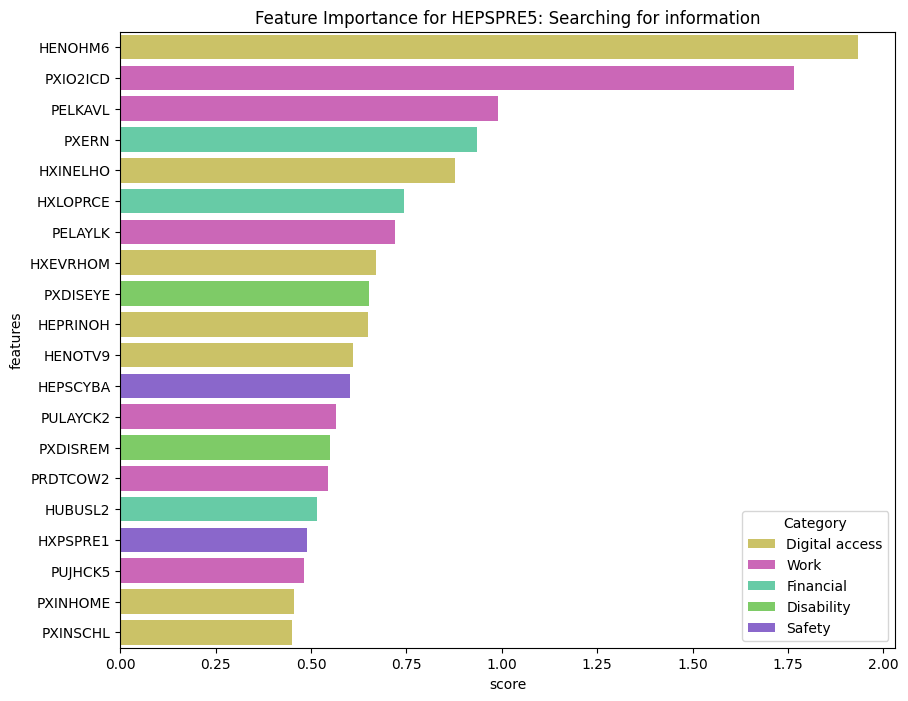

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), 'data', '2021', 'feature_importance')

# Create a color palette
# Create a list of unique categories
all_categories = []
for var_name in feat_dict.keys():
    all_categories += list(feat_dict[var_name].values())
unique_categories = list(set(all_categories))

unique_categories.sort()

# Create a color palette
palette = sns.color_palette("hls", len(unique_categories))

# Create a dictionary mapping each category to a color
color_dict = dict(zip(unique_categories, palette))

for target in range(1, 6):
    var_name = f'HEPSPRE{target}'
    importance_df = pd.read_csv(os.path.join(path, f'{var_name}.csv'))
    # select top 20 rows of the dataframe
    importance_df = importance_df.iloc[:20]

    # plot a bar chart of the feature importance, use the variable names as the y-axis labels, and use 
    # different colors for the bars depending on the category of the variable
    
    var_categories = feat_dict[var_name]

    #rename the first column to 'features'
    importance_df.rename(columns={'Unnamed: 0': 'features'}, inplace=True)

    # Create a new column in importance_df for the categories using var_categories
    importance_df['category'] = importance_df['features'].map(var_categories)

    # Plot the bar chart
    plt.figure(figsize=(10, 8))
    sns.barplot(x='score', y='features', hue='category', data=importance_df, palette=color_dict, dodge=False)

    # Show the legend
    plt.legend(title='Category')

    plt.title(f'Feature Importance for {var_name}: {ACTIVITIES_MAP[var_name][:25]}')

    # Show the plot
    # plt.show()

    plt.savefig(path + f'/HEPSPRE{target}_colored.png', dpi=300, bbox_inches='tight')

In [16]:
importance_df.columns

Index(['Unnamed: 0', 'score'], dtype='object')

In [21]:
'HEPSPRE4' in feat_dict.keys()

False

In [22]:
feat_dict.keys()

dict_keys(['HEPSPRE1', 'HEPSPRE2', 'HEPSPRE3'])